# Importar Librerias

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Accesos en el panorama nacional y regional

Como se realizó en el notebook de Data Wrangling, se pueden llegar a los datos nacionales a partir de uno de los dataframes regionales, en este caso se usa el archivo de rangos de velocidad.

In [14]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
0,2022,3,Buenos Aires,HASTA 512 kbps,29985
1,2022,3,Capital Federal,HASTA 512 kbps,517
2,2022,3,Catamarca,HASTA 512 kbps,71
3,2022,3,Chaco,HASTA 512 kbps,461
4,2022,3,Chubut,HASTA 512 kbps,109


In [104]:
nacional_accesos = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre"])['Accesos'].sum().reset_index() 
nacional_accesos.head()

,Año,Trimestre,Accesos
0,2014,1,6272846
1,2014,2,6348745
2,2014,3,6367671
3,2014,4,6475485
4,2015,1,6623212


Text(0.5, 1.0, 'Accesos por Año y Trimestre')

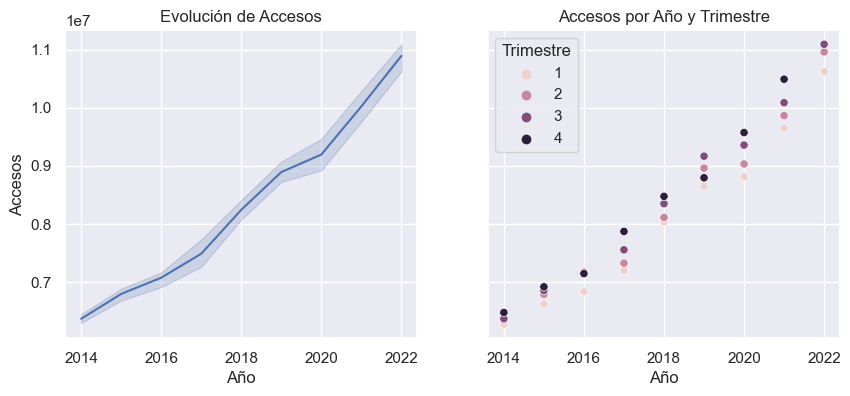

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.lineplot(data=nacional_accesos, x="Año", y="Accesos", ax=ax[0])
ax[0].set_xlabel('Año')
ax[0].set_title('Evolución de Accesos')

sns.scatterplot(data=nacional_accesos, x="Año", y="Accesos", hue="Trimestre", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Accesos por Año y Trimestre')

La tendencia de los accesos es a subir cada año, con una pequeña anomalia en el 2019, donde en el 4to trimestre presenta menos accesos que en los primeros trimestres de ese mismo año. Ese comportamiento se presenta con mayor en visiblidad en ese año y se podria ver con mayor detalle en un lineplot continuo de año y trimestre.

In [26]:
# crear una columna vacia, luego convertir cada celda de año y trimestre en string y concatenerlos

nacional_accesos["Año-Trimestre"] = None
nacional_accesos["Año-Trimestre"] = [str(nacional_accesos["Año"][i]) + "-" + str(nacional_accesos["Trimestre"][i]) for i in range(len(nacional_accesos["Año-Trimestre"]))]

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_9184\1662384353.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


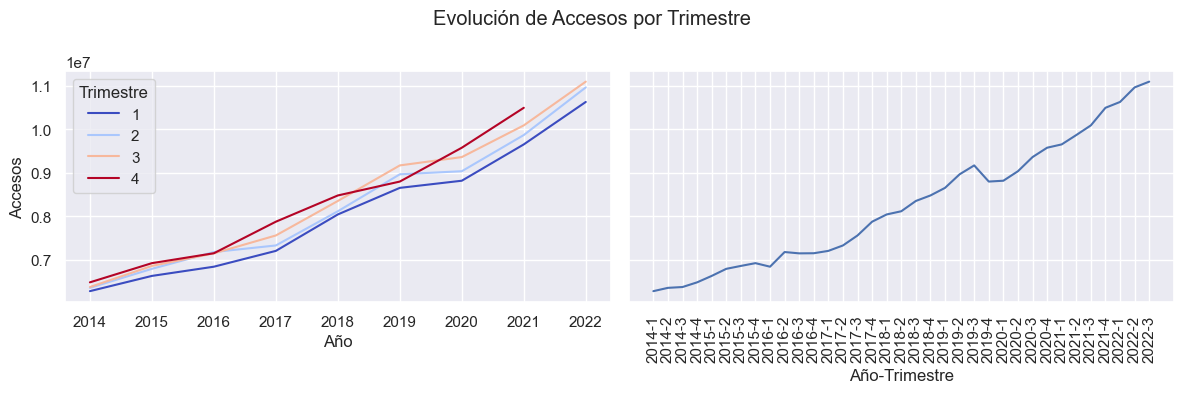

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.lineplot(data=nacional_accesos, x="Año", y="Accesos", hue="Trimestre", ax=ax[0], palette="coolwarm")
ax[0].set_xlabel('Año')

sns.lineplot(data=nacional_accesos.sort_values(by="Año-Trimestre"), x="Año-Trimestre", y="Accesos", ax=ax[1])
ax[1].set_xlabel('Año-Trimestre')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.suptitle('Evolución de Accesos por Trimestre')

plt.tight_layout()

También se puede observar que los valores de trimestre se encuentran mas concentrados entre los años 2014 y 2016, esto muestra el menor progreso que hubo en esos años en terminos de cubertura si los comparamos en los años posteriores. En los graficos de distribución se puede observar mejor.

Text(0.5, 1.0, 'Diagrama de violin de Accesos por año')

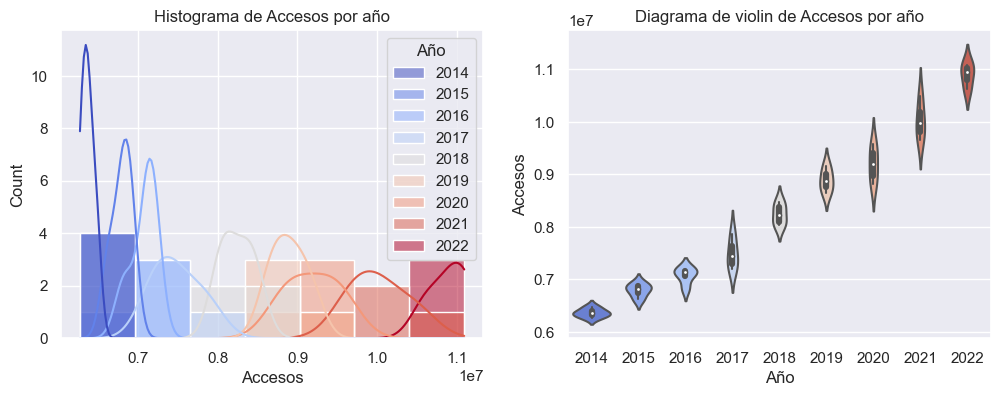

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=nacional_accesos, x="Accesos", hue="Año", palette="coolwarm", kde=True, ax=ax[0])
ax[0].set_xlabel('Accesos')
ax[0].set_title('Histograma de Accesos por año')

sns.violinplot(data=nacional_accesos, y="Accesos", x="Año", palette="coolwarm", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Diagrama de violin de Accesos por año')

En el histograma se puede ver como se concentran los valores menores de Accesos para los primeros años del dataset, lo cual es esperable porque, como se mencionó anteriormente, el numero de accesos aumenta cada año, pero en el diagrama de violin se puede observar entre 2014 y 2016 como estan concentrados horizontalmente los datos, es decir, durante esos años hubo poco progreso (vertical) en ese periodo de tiempo, como se vió en el grafico de trimestres, mientras que en los años posteriores se ve como los valores minimos y maximos de cada año estan mas separados y por lo tanto hubo mayores saltos de acceso a internet en esos periodos.

Text(0.5, 1.0, 'Distribucion de accesos')

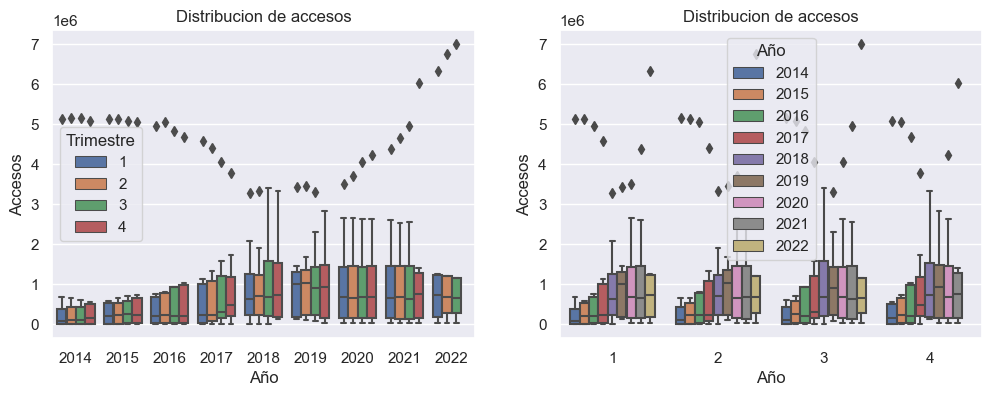

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=rango_velocidad_nacional_unpivot, x='Año', y='Accesos', hue='Trimestre', ax=ax[0])
ax[0].set_xlabel('Año')
ax[0].set_title('Distribucion de accesos')

sns.boxplot(data=rango_velocidad_nacional_unpivot, x='Trimestre', y='Accesos', hue='Año', ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Distribucion de accesos')

Para facilitar el analisis provincial, se agruparan las provincias en cuatro regiones principales: Noroeste (NOA), Nordeste(NEA), Central, Cuyo y Patagonia

In [16]:
regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()   
regional_accesos.head()

,Provincia,Año,Trimestre,Accesos
0,Buenos Aires,2014,1,2624541
1,Buenos Aires,2014,2,2659316
2,Buenos Aires,2014,3,2647181
3,Buenos Aires,2014,4,2705953
4,Buenos Aires,2015,1,2754612


In [15]:
regional_accesos["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe',
       'Mendoza', 'Entre Ríos', 'Tucumán', 'Salta', 'Misiones', 'Chubut',
       'Neuquén', 'Río Negro', 'Corrientes', 'Chaco',
       'Santiago Del Estero', 'San Luis', 'Jujuy', 'La Pampa', 'San Juan',
       'La Rioja', 'Catamarca', 'Formosa', 'Tierra Del Fuego',
       'Santa Cruz'], dtype=object)

In [65]:
noa = ['Tucumán', 'Salta', 'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Catamarca']
nea = ['Corrientes', 'Chaco', 'Misiones', 'Formosa']
central = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe', 'Entre Ríos']
cuyo = ['Mendoza', 'San Luis', 'San Juan']
patagonia = ['Chubut','Neuquén', 'Río Negro', 'Tierra Del Fuego','Santa Cruz', 'La Pampa']

Una vez definidas las regiones, se crea una función que realizar graficos de barras recibiendo como argumentos una lista de provincias, el numero de columnas que deseamos y el ancho y alto de la figura resultante.

In [51]:
def barplot_list(lista, columnas, ancho, altura):
    # carga de datos y agrupacion de columnas
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
    regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index().sort_values(by="Accesos", ascending=False)  
    
    # crea un df de solo las provincias de la lista
    df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura))
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
        ax.set_title(provincia)

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()

    


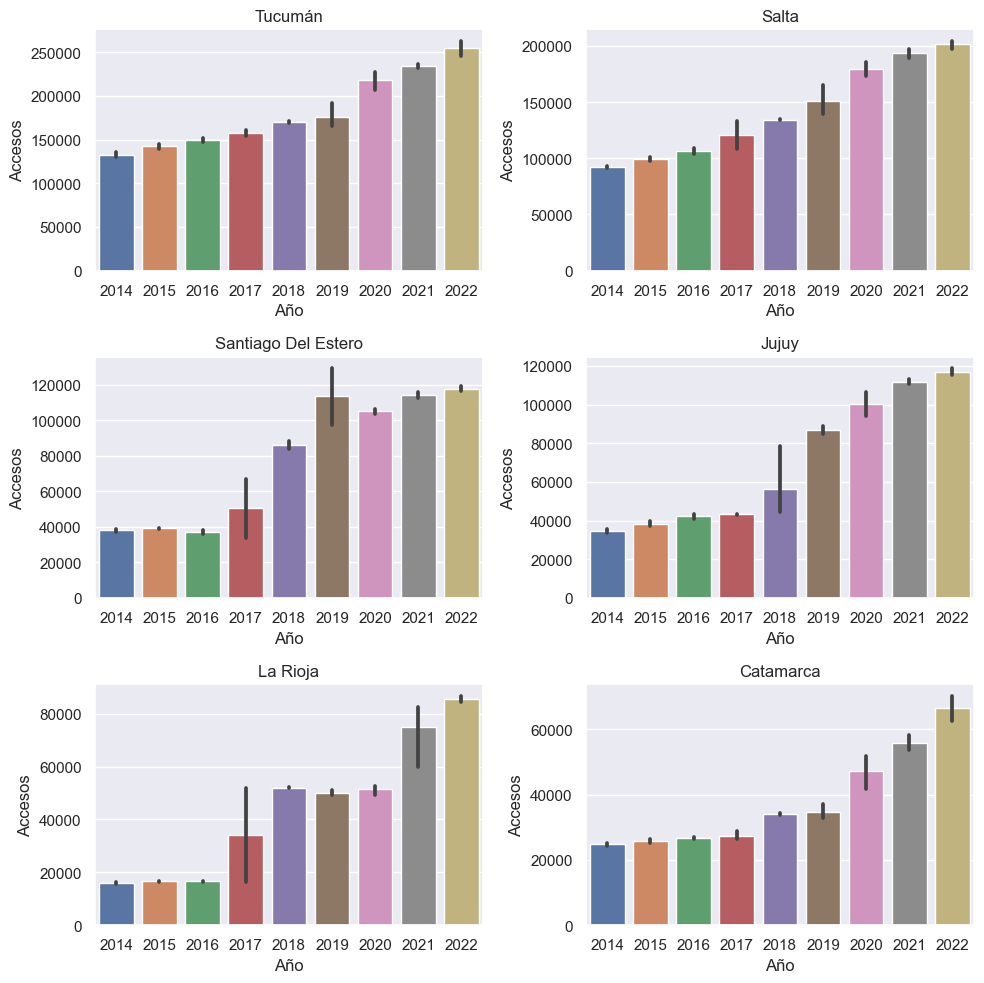

In [52]:
barplot_list(noa, 2, 10, 10)

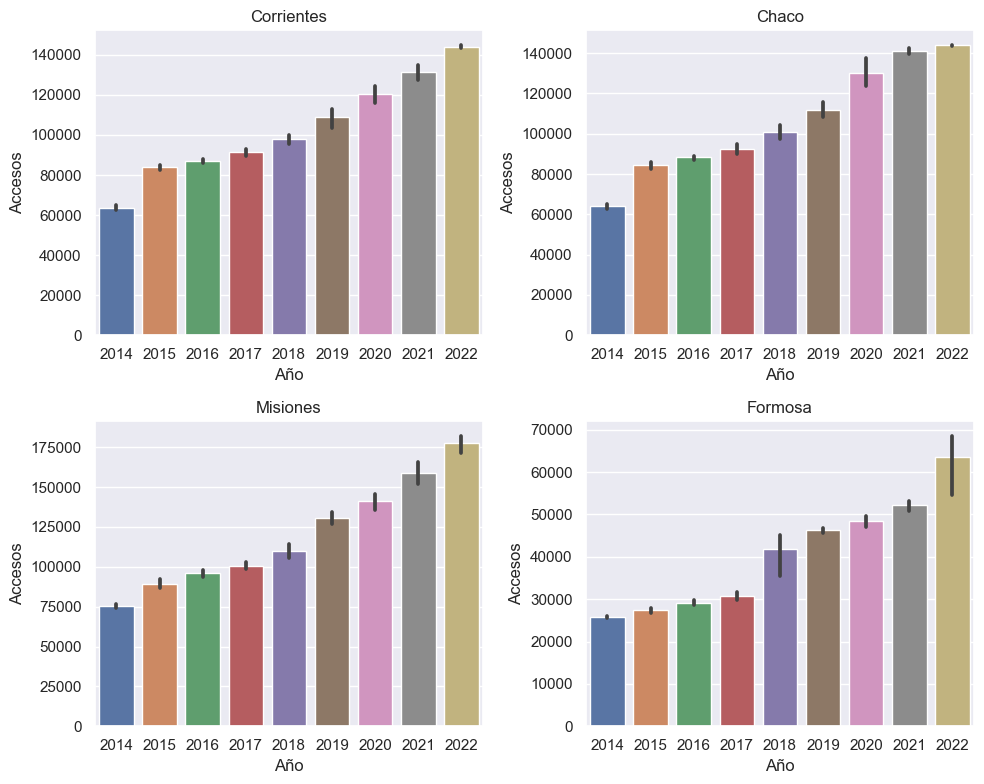

In [54]:
barplot_list(nea, 2, 10, 8)

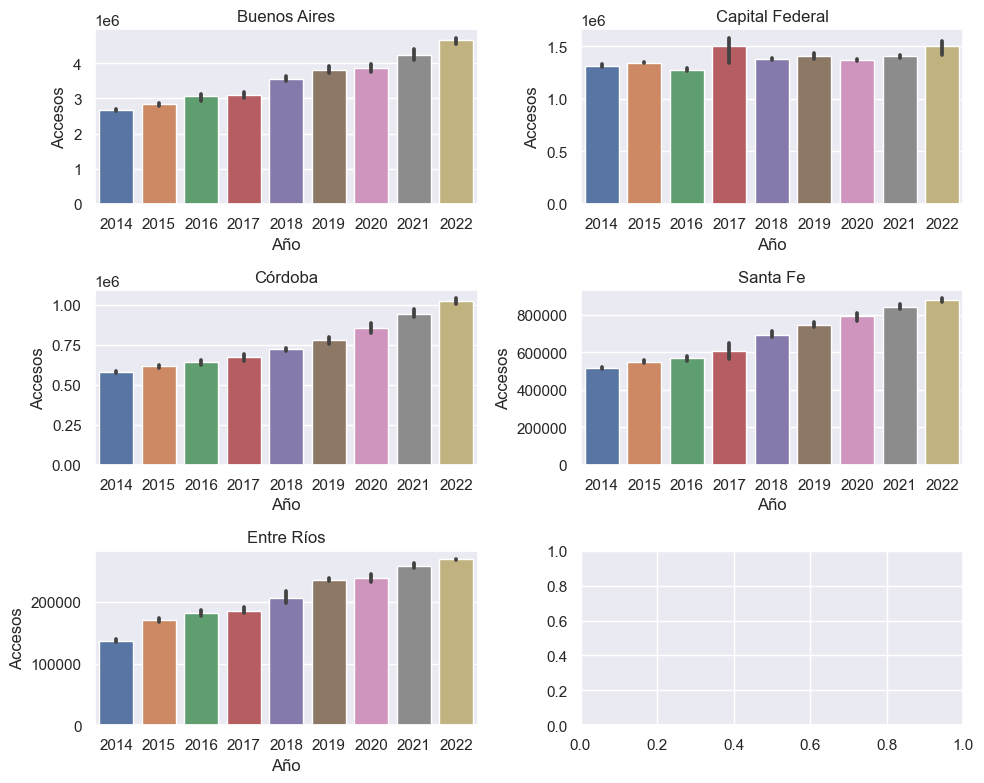

In [55]:
barplot_list(central, 2, 10, 8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


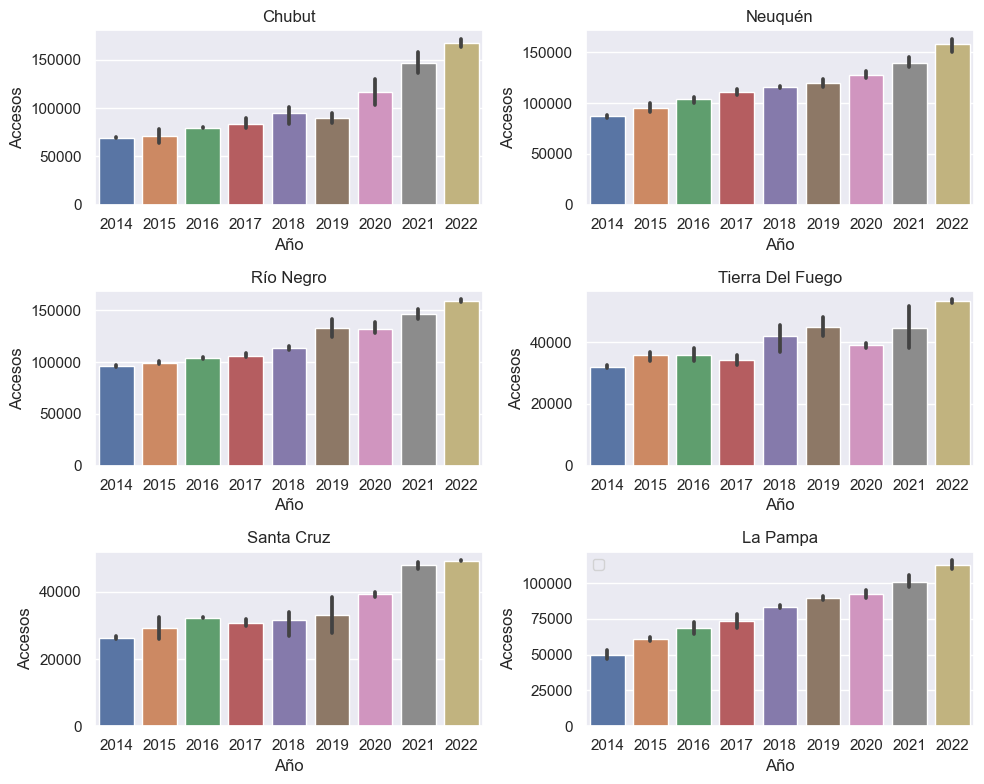

In [80]:
barplot_list(patagonia, 2, 10, 8)

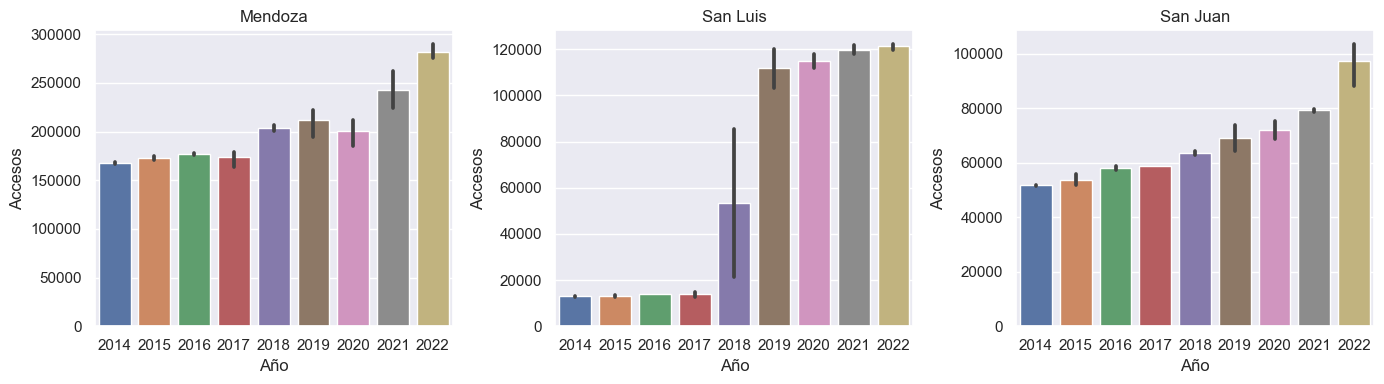

In [56]:
barplot_list(cuyo, 3, 14, 4)

En general, la variable Accesos en todas las provincias tiene un comportamiento ascendente, pero hay periodos donde el progreso no es muy notorio y se ve cierto estancamiento como en el caso de Mendoza 2014-2017, o Capital Federeal 2014-2022.

La barra negra que hay en cada barra es una medida de variabilidad de los datos, si la barra es corta, como en la mayoria de los años, significa que no hay mucha diferencia en los datos trimestrales de ese año. Si la barra es muy grande, como en el caso de San Luis 2018 o La Rioja 2017 quiere decir que la variabilidad es muy grande. Esto puede deberse a errores de medicion o a programas locales de inversion en infraestructura que se tradujeron en mayor accesiblidad para la población.

Ahora, para hallar las proporciones de la cantidad de accesos de acuerdo a las provincias, se crea un funcion que crea un grafico de tartas para un año dado, esta funcion recibe el año a analizar y el umbral. El umbral, en ese caso, es el porcentaje (en fracción) que define que provincias van a entrar a la categoria de "Otros", es decir, para evitar que valores muy pequeños en el grafico, se define un minimo para entrar a ser representado como provincia. Si el umbral es 5% (0.05) quiere decir que si los accesos de esa provincia no supera el 5% del total de accesos nacional, los accesos de esta provincia pasaran parte a la categoria llamada "Otros".

In [85]:
def pieplot_anio (anio, umbral):
    # carga de dataframe
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")

    # filtrar df por año y se agrupa por provincias
    accesos_por_provincia = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Año"] == anio]
    accesos_provincia_agrupado = accesos_por_provincia.groupby('Provincia')['Accesos'].sum()

    # se usa el umbral definido para crear la categoria "Otros"
    umbral = umbral
    total_accesos = accesos_provincia_agrupado.sum()
    valores_pequenos = accesos_provincia_agrupado[accesos_provincia_agrupado < umbral * total_accesos]
    valor_otros = valores_pequenos.sum()

    # se usa el umbral para crear las categorias que no entran en "Otros"
    accesos_provincia_agrupado_nuevo = accesos_provincia_agrupado[accesos_provincia_agrupado >= umbral * total_accesos]
    accesos_provincia_agrupado_nuevo['Otros'] = valor_otros

    # %1.1f%% es el formato de salida del numero, un entero, un decimal seguido el simbolo %
    plt.pie(accesos_provincia_agrupado_nuevo.values, labels=accesos_provincia_agrupado_nuevo.index, autopct='%1.1f%%')
    
    return plt.title("Proporción de Accesos por Provincia del año " + str(anio))

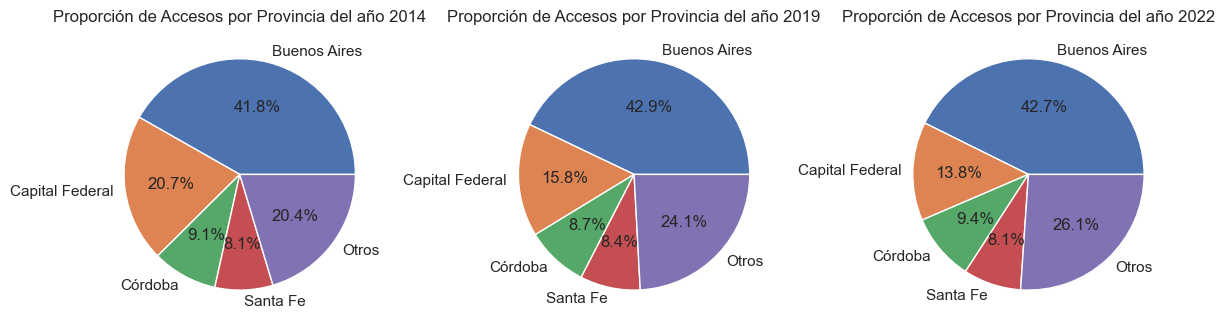

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# sca es set current axis
# plt.sca(ax[0]), se establece el primer eje (ax[0]) como el eje activo actual, lo que significa que todas las 
# operaciones de trazado posteriores se realizarán en ese subplot

plt.sca(ax[0])
pieplot_anio(2014, 0.03)

plt.sca(ax[1])
pieplot_anio(2019, 0.03)

plt.sca(ax[2])
pieplot_anio(2022, 0.03)

plt.tight_layout()



Aqui se puede observar que los accesos de la provincia de Buenos Aires representa casi la mitad de los accesos del pais durante todo el periodo registrado, mientras que la proporción de los accesos de la Capital Federal ha bajado significativamente. Teniendo en cuenta que, en cantidad, los accesos de la Capital Federal se han mantenido constantes, la bajada en su proporción indica un aumento de los accesos en el resto del pais.

# Rangos de velocidad de descarga

## Datos Nacionales

Se extraen los datos nacionales a partir de los datos regionales al igual que en la seccion anterior.

In [28]:
rango_velocidad_nacional_unpivot = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre", "Rango Velocidad"])['Accesos'].sum().reset_index()
rango_velocidad_nacional_unpivot.head()

,Año,Trimestre,Rango Velocidad,Accesos
0,2014,1,+ 1 Mbps - 6 Mbps,5130294
1,2014,1,+ 10 Mbps - 20 Mbps,101127
2,2014,1,+ 20 Mbps - 30 Mbps,345
3,2014,1,+ 30 Mbps,11595
4,2014,1,+ 512 Kbps - 1 Mbps,687619


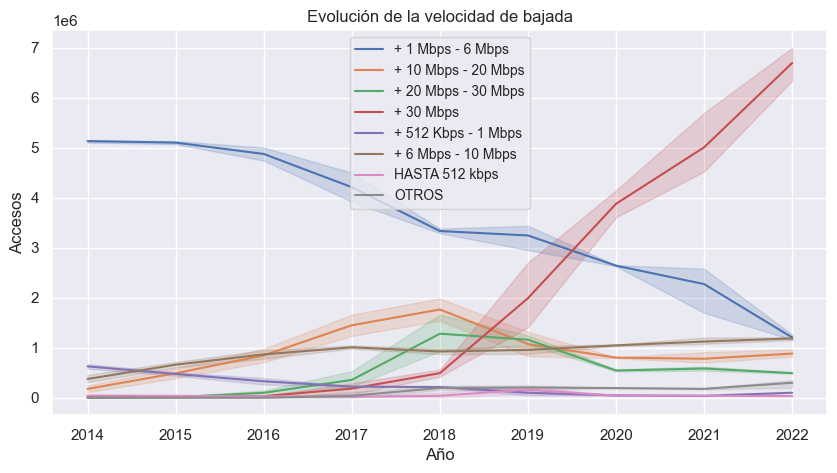

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(data=rango_velocidad_nacional_unpivot, x="Año", y="Accesos", hue="Rango Velocidad")
ax.set_xlabel('Año')
ax.set_title('Evolución de la velocidad de bajada')
plt.legend(fontsize='small')

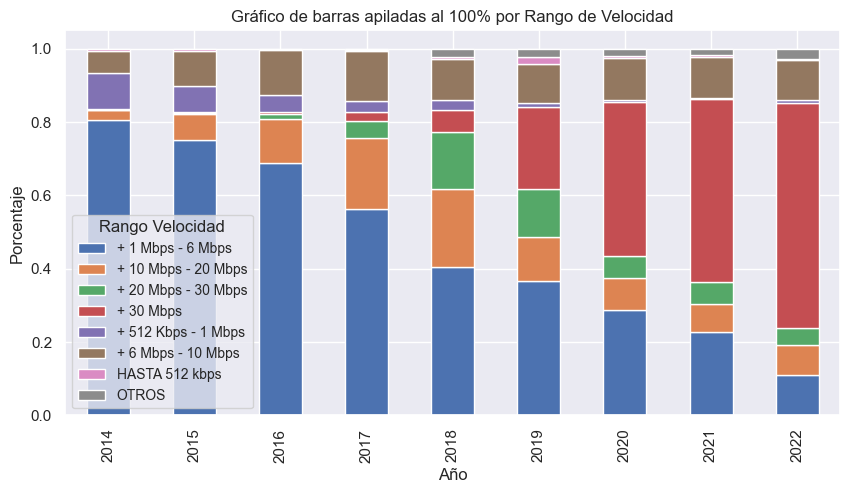

In [56]:
# transform() calcula una funcion de agregacion y devuelve el resultado en una serie
serie_totales = rango_velocidad_nacional_unpivot.groupby('Año')['Accesos'].transform('sum')
rango_velocidad_nacional_unpivot['Porcentaje'] = rango_velocidad_nacional_unpivot['Accesos'] / serie_totales

# con pivot_table se hace el proceso inverso que se hizo en el anterior notebook (melt()), 
# pero esta vez se usan porcentajes como valores y no accesos
tabla_dinamica = rango_velocidad_nacional_unpivot.pivot_table(index='Año', columns='Rango Velocidad', values='Porcentaje', aggfunc='sum')

fig, ax = plt.subplots(figsize=(10, 5))
tabla_dinamica.plot.bar(stacked=True, ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje')
ax.set_title('Gráfico de barras apiladas al 100% por Rango de Velocidad')
plt.legend(title='Rango Velocidad', fontsize='small')

plt.show()


Hay cambios de velocidad en todos los rangos a traves del tiempo, pero hay dos rangos que resaltan tanto en el grafico de lineas como en el grafico de barras apiladas. El rango de 1 - 6 Mbps se reduce desde 80% en 2014 hasta el 10% en 2022, mientras que el rango de mas de 30 Mbps, casi inexistente hasta el 2017, aumenta hasta alrededor del 60% par el año 2022.

## Datos Regionales

In [64]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
0,2022,3,Buenos Aires,HASTA 512 kbps,29985
1,2022,3,Capital Federal,HASTA 512 kbps,517
2,2022,3,Catamarca,HASTA 512 kbps,71
3,2022,3,Chaco,HASTA 512 kbps,461
4,2022,3,Chubut,HASTA 512 kbps,109


In [ ]:
rango_velocidad_regional_unpivot.describe()

,Año,Trimestre,Accesos
count,6714.000000,6714.000000,6.714000e+03
mean,2017.884718,2.457551,4.303703e+04
std,2.528337,1.104842,1.856786e+05
min,2014.000000,1.000000,-1.945000e+03
25%,2016.000000,1.000000,6.700000e+01
50%,2018.000000,2.000000,3.376000e+03
75%,2020.000000,3.000000,2.312500e+04
max,2022.000000,4.000000,3.618689e+06


La función describe() muestra valores negativos de accesos, se puede deshacer de estos con una comprehension lista condicional reemplazando esos valores negativos con ceros.

In [ ]:
rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Accesos"] < 0]

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
6035,2021,1,La Rioja,OTROS,-1
6043,2021,1,Santa Cruz,OTROS,-1945


In [60]:
rango_velocidad_regional_unpivot["Accesos"] = [0 if x < 0 else x for x in rango_velocidad_regional_unpivot["Accesos"]]

De la misma forma que se realizó la funcion para crear subplots de graficos de barras, se realiza otra para graficar la evolución de los rangos de velocidad por region. En este caso se agregan dos lineas extras para ubicar la leyenda de la mejor manera posible para que obstaculice la lectura apropiada.

In [111]:
def lineplot_list(lista, columnas, ancho, altura, leyenda_letra, leyenda_x, leyenda_y):
    # carga de datos y agrupacion de columnas
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
    #regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()
    
    # crea un df de solo las provincias de la lista
    df_filtrado = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura))
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.lineplot(data=data_provincia, x="Año", y="Accesos", hue="Rango Velocidad", ax=ax)
        ax.set_title(provincia)
        # Remover la leyenda de los subplots
        ax.get_legend().remove()
        
    # Agregar una única leyenda para la figura
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Rango Velocidad', bbox_to_anchor=(leyenda_x, leyenda_y), prop={'size': leyenda_letra})

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()


Notar que la nueva función recibe tres argumentos mas: las coordendas horizontal y vertical de la posicion de la leyenda y el tamaño de letra de esta.

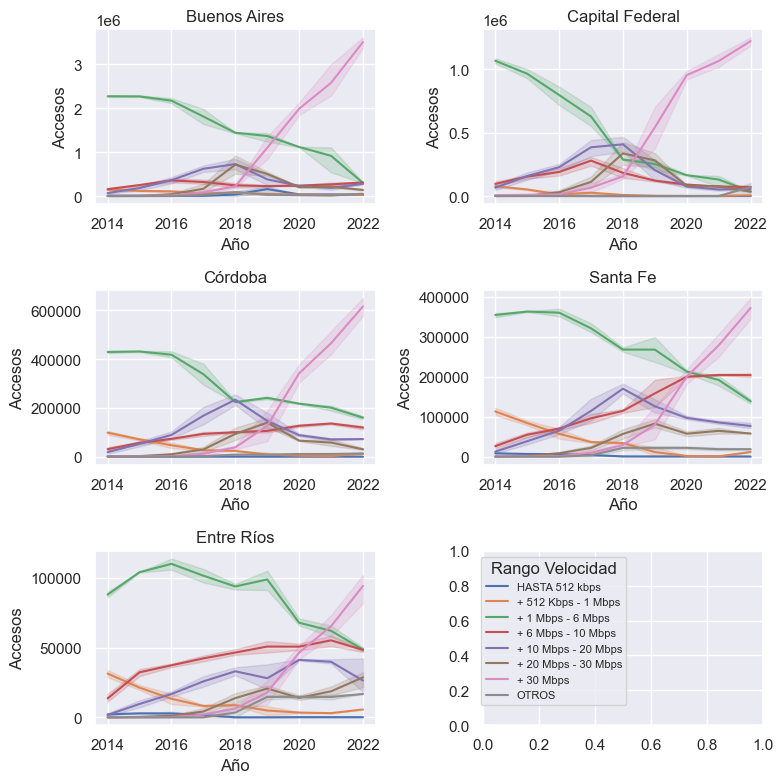

In [112]:
lineplot_list(central, 2, 8, 8, 8, 0.8, 0.3)

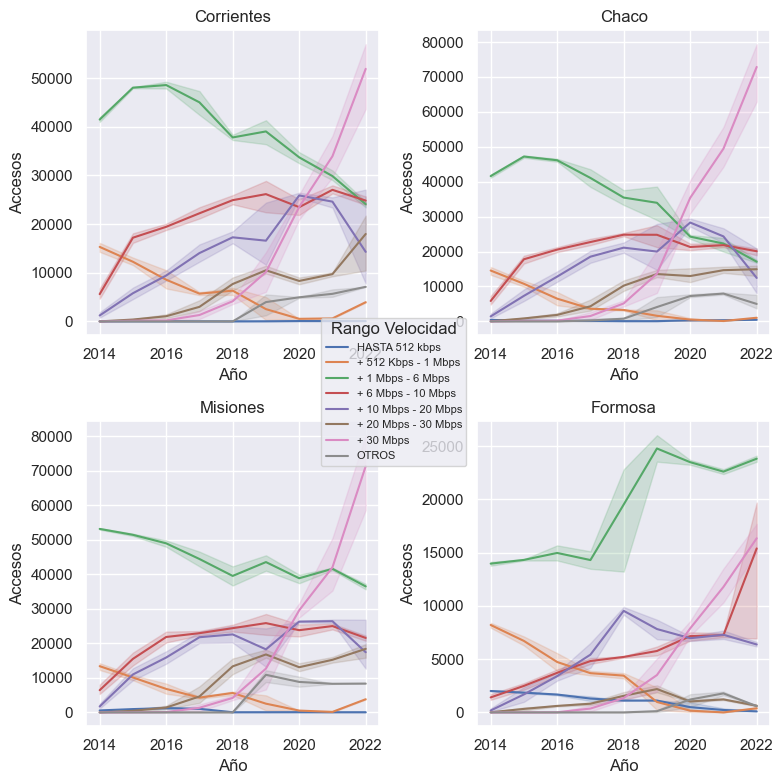

In [116]:
lineplot_list(nea, 2, 8, 8, 8, 0.6, 0.6)

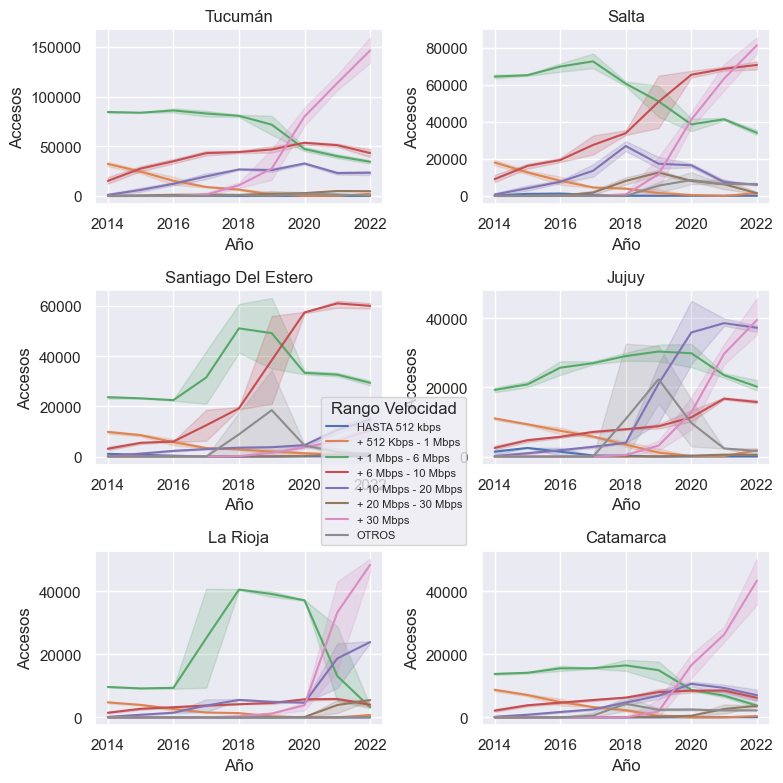

In [120]:
lineplot_list(noa, 2, 8, 8, 8, 0.6, 0.5)

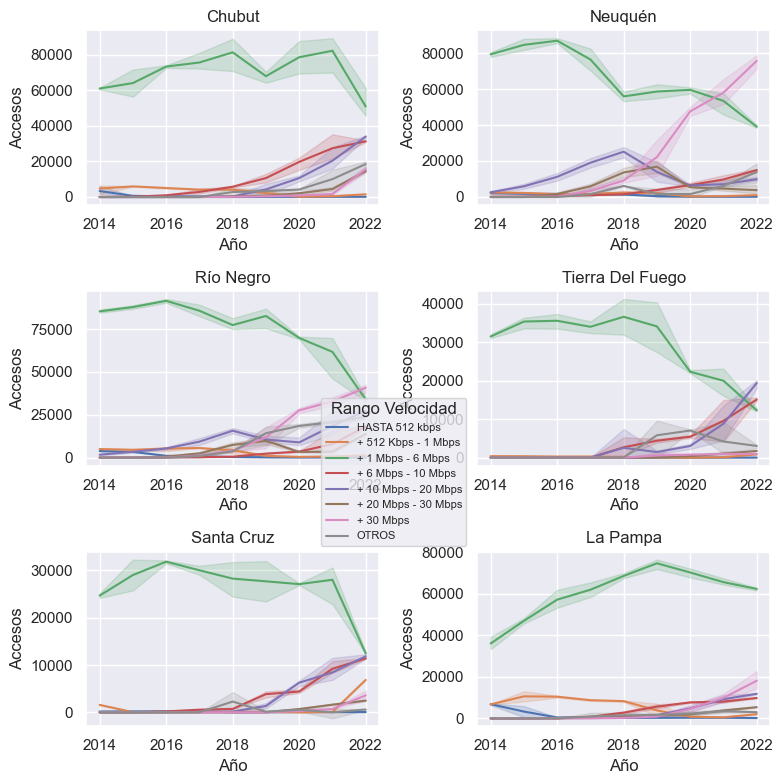

In [126]:
lineplot_list(patagonia, 2, 8, 8, 8, 0.6, 0.5)

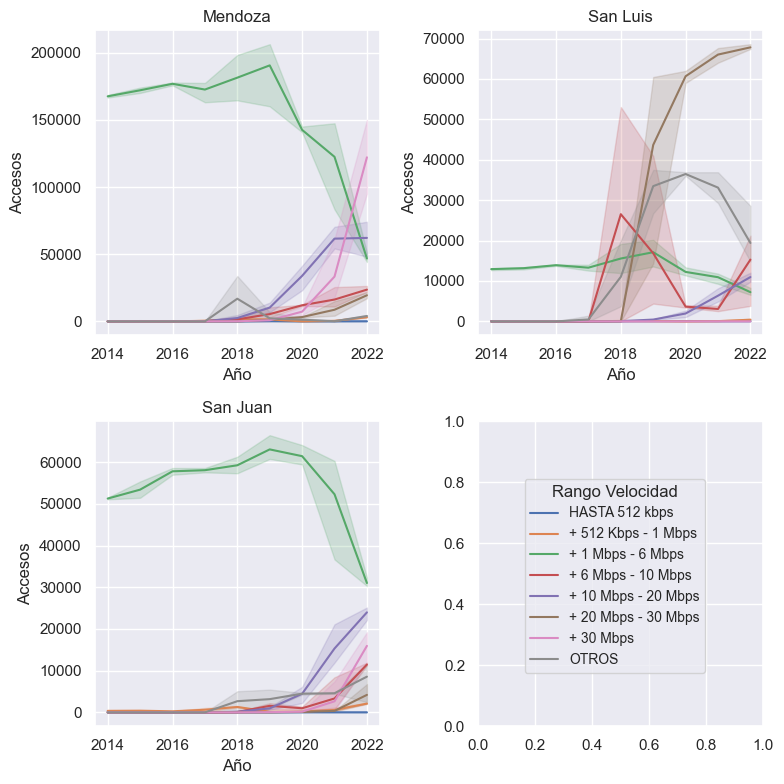

In [128]:
lineplot_list(cuyo, 2, 8, 8, 10, 0.9, 0.4)

# Covertura y Velocidad Media

## Datos nacionales

In [21]:
penetracion_velocidad_nacional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_nacional_internet_fijo.csv")
penetracion_velocidad_nacional_internet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada)
0,2022,3,76.64,23.95,62.46
1,2022,2,75.97,23.72,58.44
2,2022,1,73.88,23.05,55.11
3,2021,4,73.18,22.81,52.34
4,2021,3,70.58,21.98,48.46


In [22]:
penetracion_velocidad_nacional_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Mbps (Media de bajada)        35 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [23]:
penetracion_velocidad_nacional_internet_fijo.isna().mean()

Año                             0.0
Trimestre                       0.0
Accesos por cada 100 hogares    0.0
Accesos por cada 100 hab        0.0
Mbps (Media de bajada)          0.0
dtype: float64

In [24]:
penetracion_velocidad_nacional_internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286,21.827143
std,2.564135,1.120474,8.148909,2.662968,19.230717
min,2014.000000,1.000000,49.550000,15.050000,3.620000
25%,2016.000000,1.500000,52.985000,16.245000,5.250000
50%,2018.000000,2.000000,59.160000,18.240000,13.850000
75%,2020.000000,3.000000,66.050000,20.475000,39.495000
max,2022.000000,4.000000,76.640000,23.950000,62.460000


Text(0.5, 1.0, 'Distribution of Accesos por cada 100 hab')

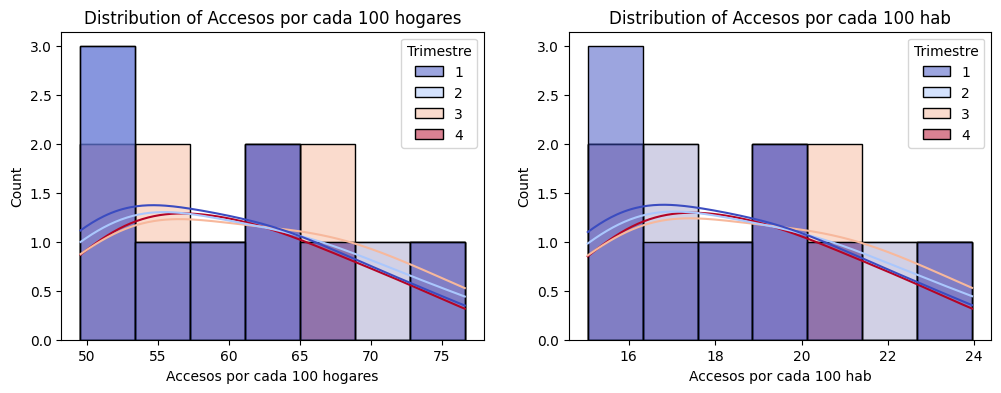

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=penetracion_velocidad_nacional_internet_fijo, x="Accesos por cada 100 hogares", hue="Trimestre", ax=ax[0], kde=True, palette="coolwarm")
ax[0].set_xlabel('Accesos por cada 100 hogares')
ax[0].set_title('Distribution of Accesos por cada 100 hogares')


sns.histplot(data=penetracion_velocidad_nacional_internet_fijo, x="Accesos por cada 100 hab", hue="Trimestre", ax=ax[1], kde=True, palette="coolwarm")
ax[1].set_xlabel('Accesos por cada 100 hab')
ax[1].set_title('Distribution of Accesos por cada 100 hab')

## For regional data

In [2]:
general_nacional= pd.read_csv("../processed_data/general_nacional.csv")

c:\Users\ASUS X515\Documents\Programacion_Data\proyectos\argentinian-telecommunications-analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


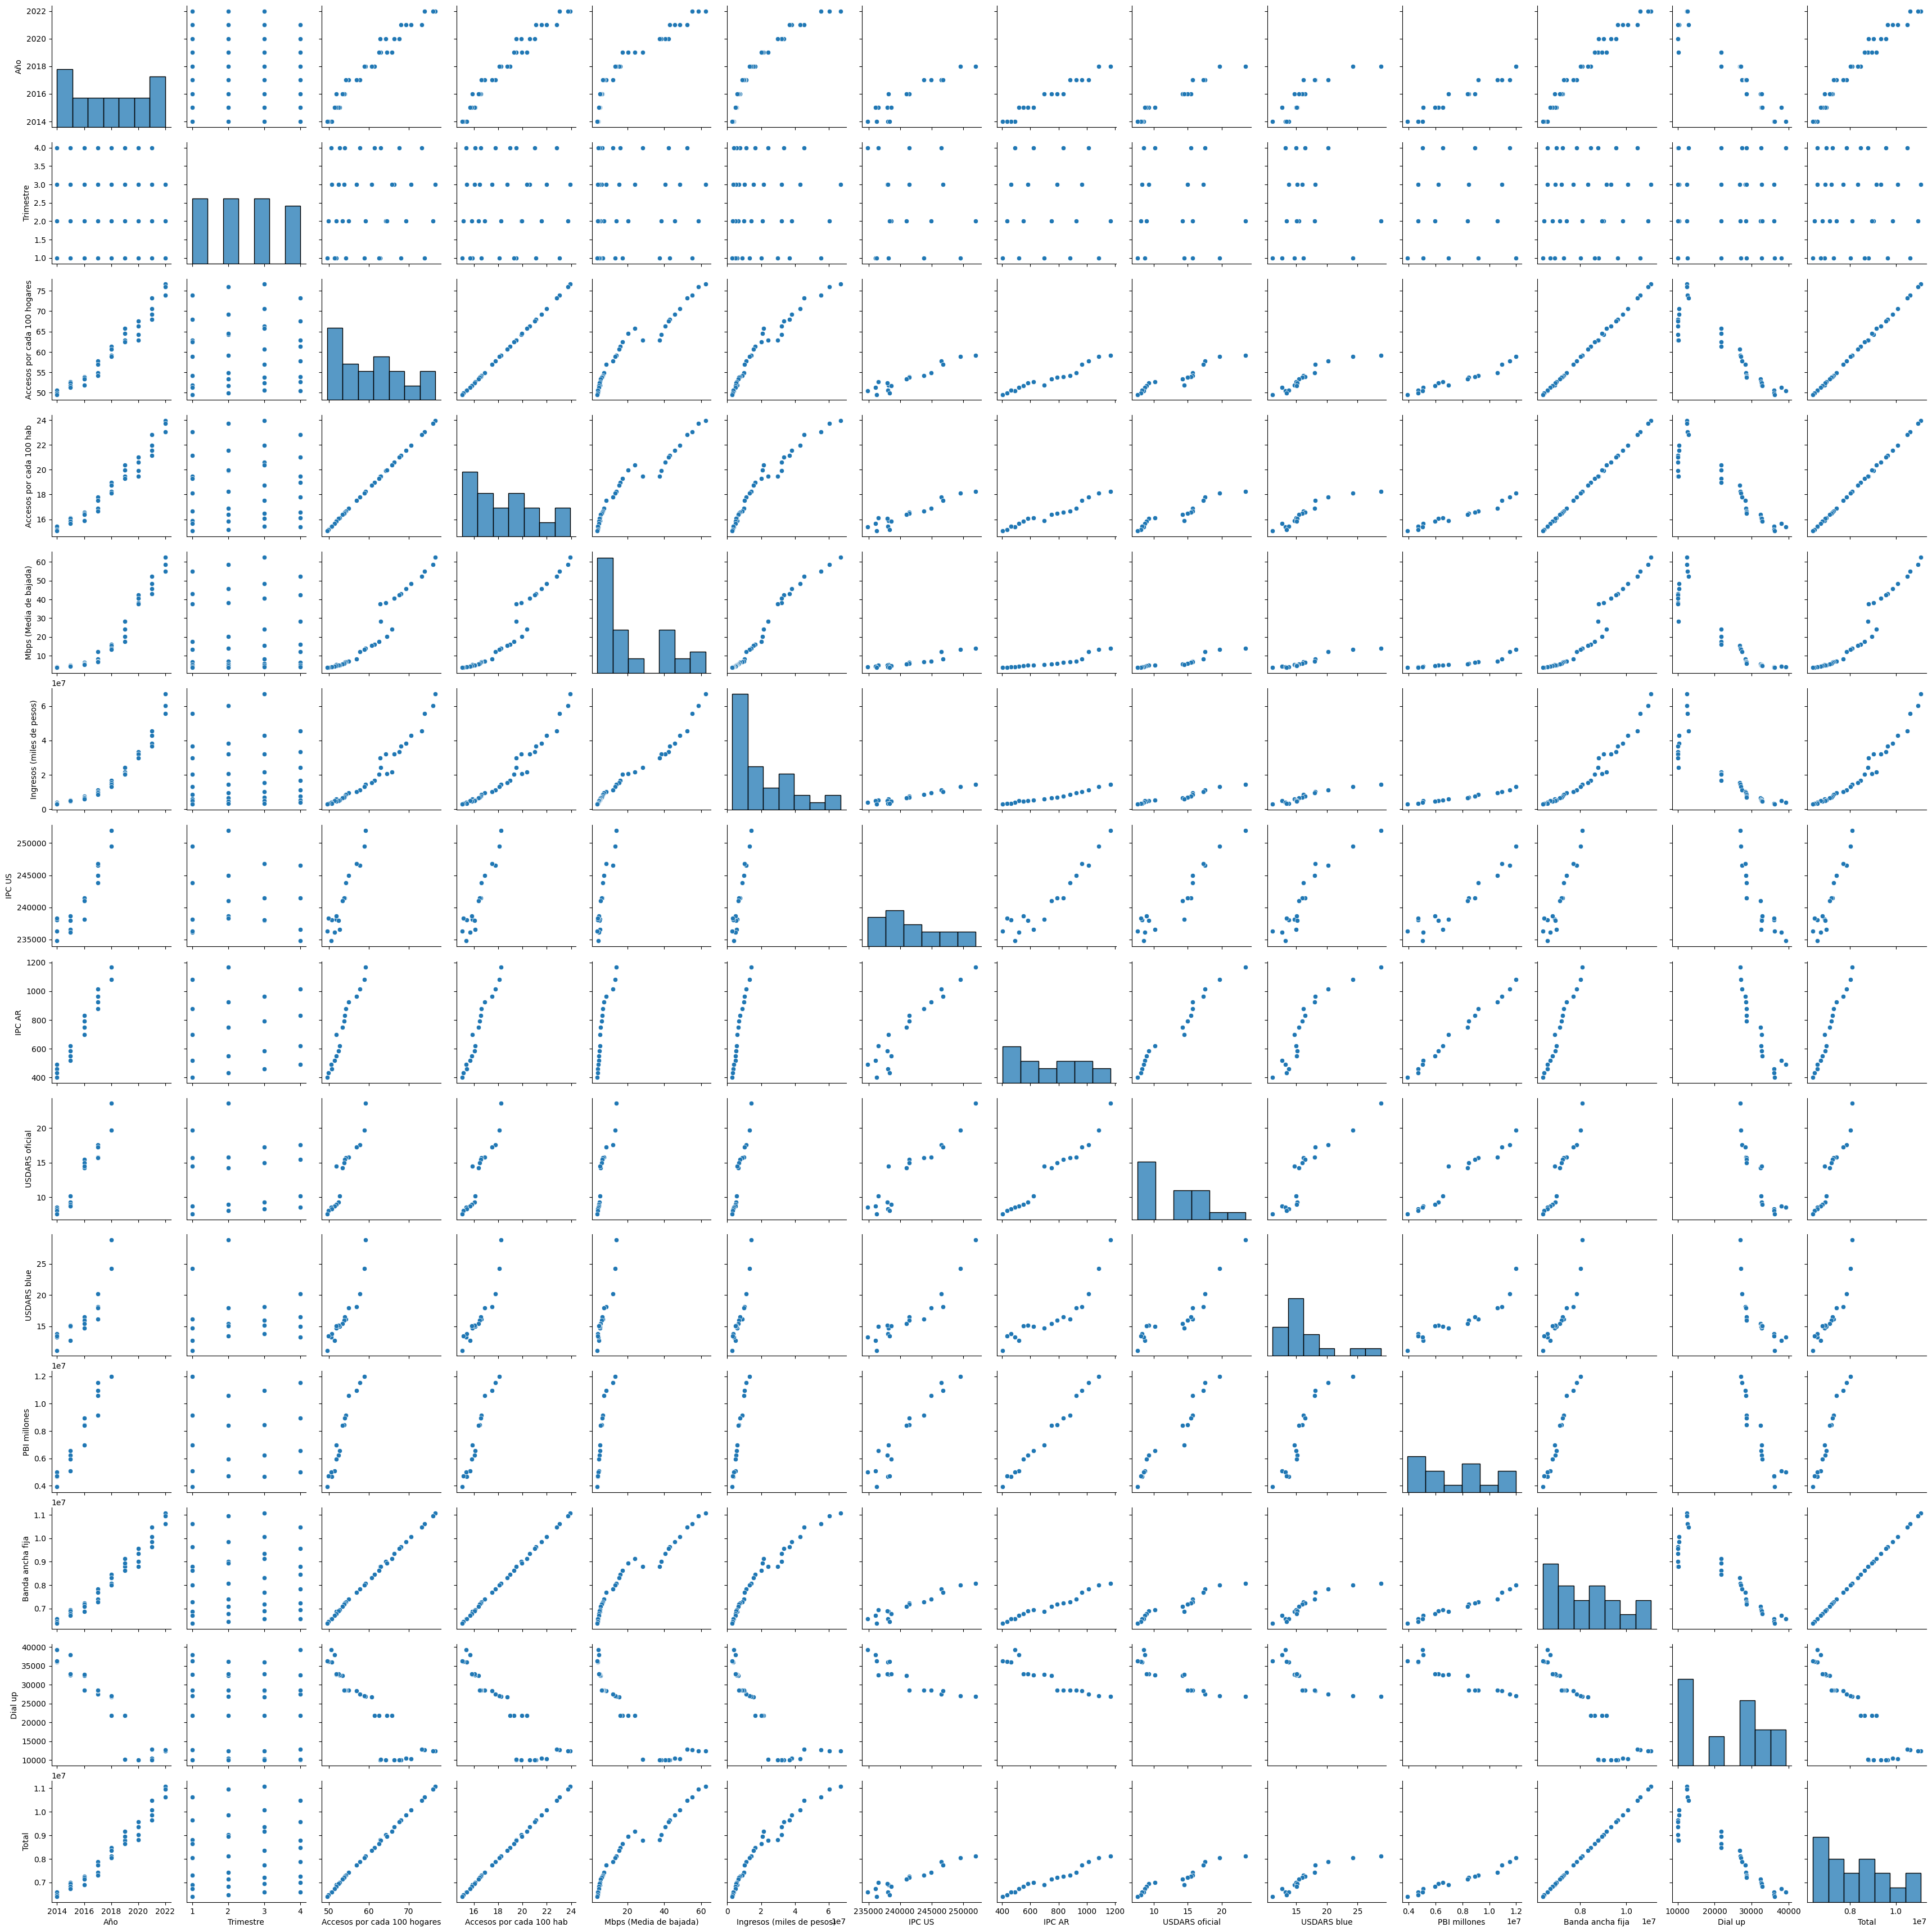

In [3]:
sns.pairplot(data=general_nacional)